In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
sim_df = pd.read_csv('intermittent_time_series.csv')
sim_df.head()

,unique_id,ds,y
0,1,2023-01-01 00:00:00,43
1,1,2023-01-01 01:00:00,87
2,1,2023-01-01 02:00:00,89
3,1,2023-01-01 03:00:00,87
4,1,2023-01-01 04:00:00,73


## Croston 

In [3]:
from statsforecast import StatsForecast
from statsforecast.models import CrostonClassic

models = [CrostonClassic()]

sf = StatsForecast(
    df=sim_df,
    models=models,
    freq='H',
    n_jobs=-1
)

cv_df = sf.cross_validation(
    df=sim_df,
    h=1,
    step_size=1,
    n_windows=50
)

cv_df.index = np.arange(50, 100, 1)

D:\Anaconda\lib\site-packages\statsforecast\core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


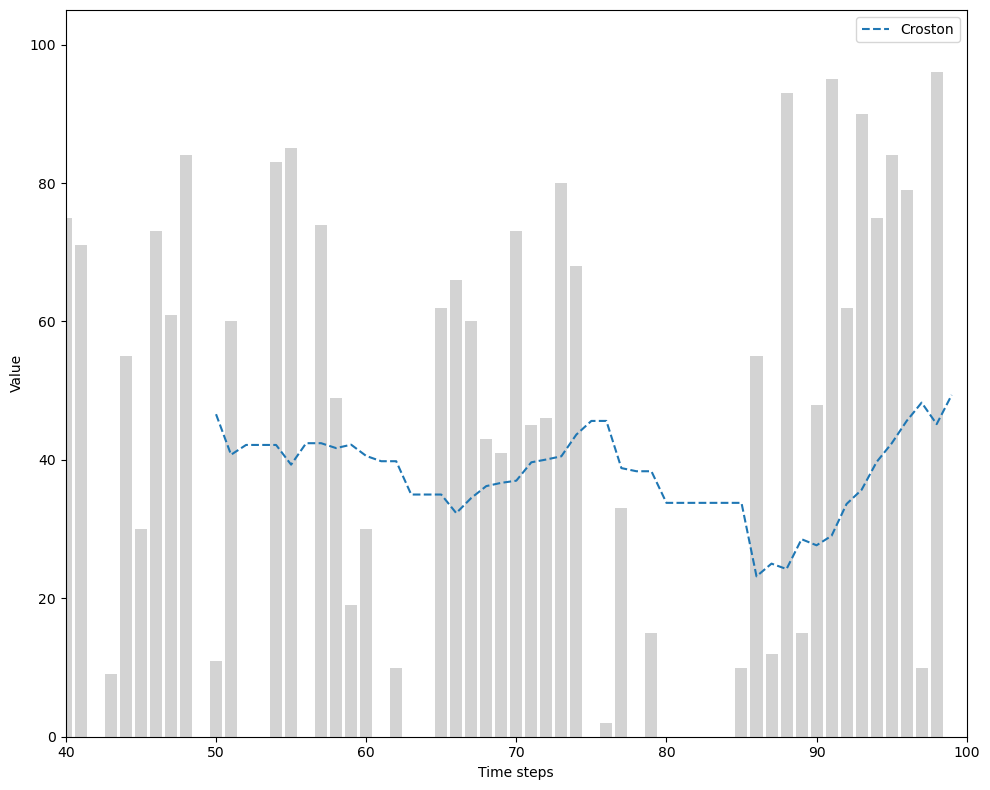

In [4]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(sim_df.index, sim_df['y'], color='lightgray')
ax.plot(cv_df.index, cv_df['CrostonClassic'], ls='--', label='Croston')
ax.set_ylabel('Value')
ax.set_xlabel('Time steps')
ax.legend(loc='best')
plt.xlim(40, 100)

plt.tight_layout()

In [5]:
from statsforecast.models import CrostonOptimized

models = [CrostonOptimized()]

sf = StatsForecast(
    df=sim_df,
    models=models,
    freq='H',
    n_jobs=-1
)

cv_df = sf.cross_validation(
    df=sim_df,
    h=1,
    step_size=1,
    n_windows=50
)

cv_df.index = np.arange(50, 100, 1)

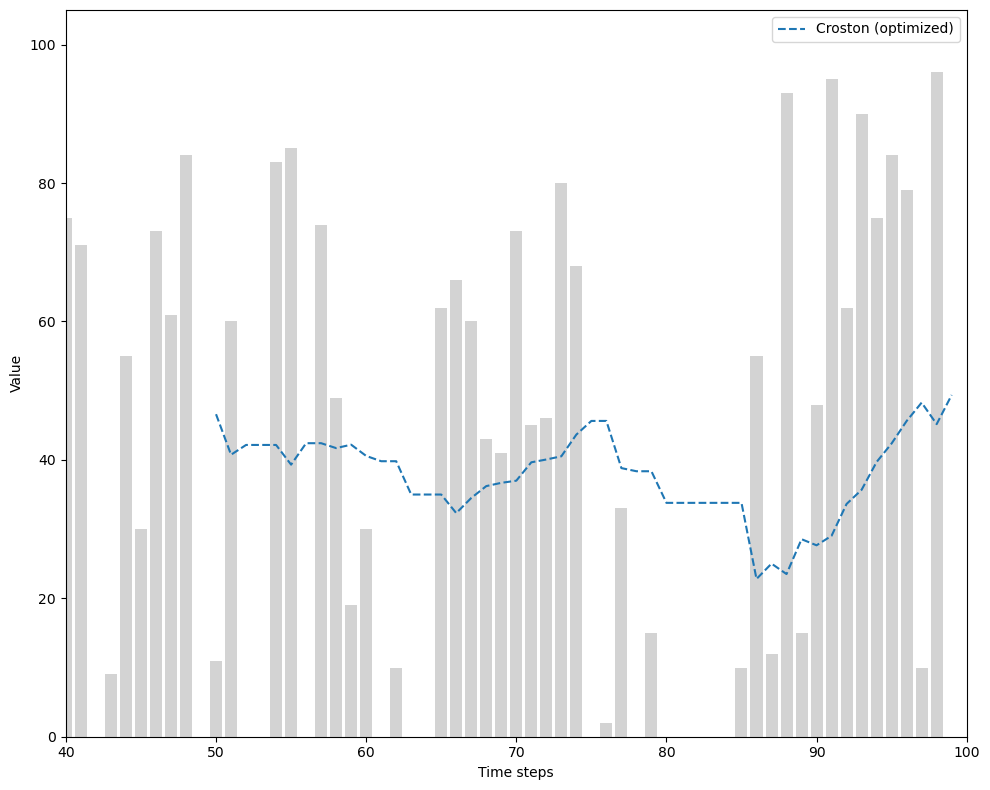

In [6]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(sim_df.index, sim_df['y'], color='lightgray')
ax.plot(cv_df.index, cv_df['CrostonOptimized'], ls='--', label='Croston (optimized)')
ax.set_ylabel('Value')
ax.set_xlabel('Time steps')
ax.legend(loc='best')
plt.xlim(40, 100)

plt.tight_layout()

## ADIDA 

In [7]:
agg_sim_df = sim_df['y'].rolling(window=5, step=5).sum()
agg_sim_df.reset_index(drop=True)

0       NaN
1     358.0
2     161.0
3     290.0
4     185.0
5      86.0
6     281.0
7     103.0
8     305.0
9     165.0
10    229.0
11    228.0
12    172.0
13     72.0
14    283.0
15    239.0
16     50.0
17     10.0
18    223.0
19    406.0
Name: y, dtype: float64

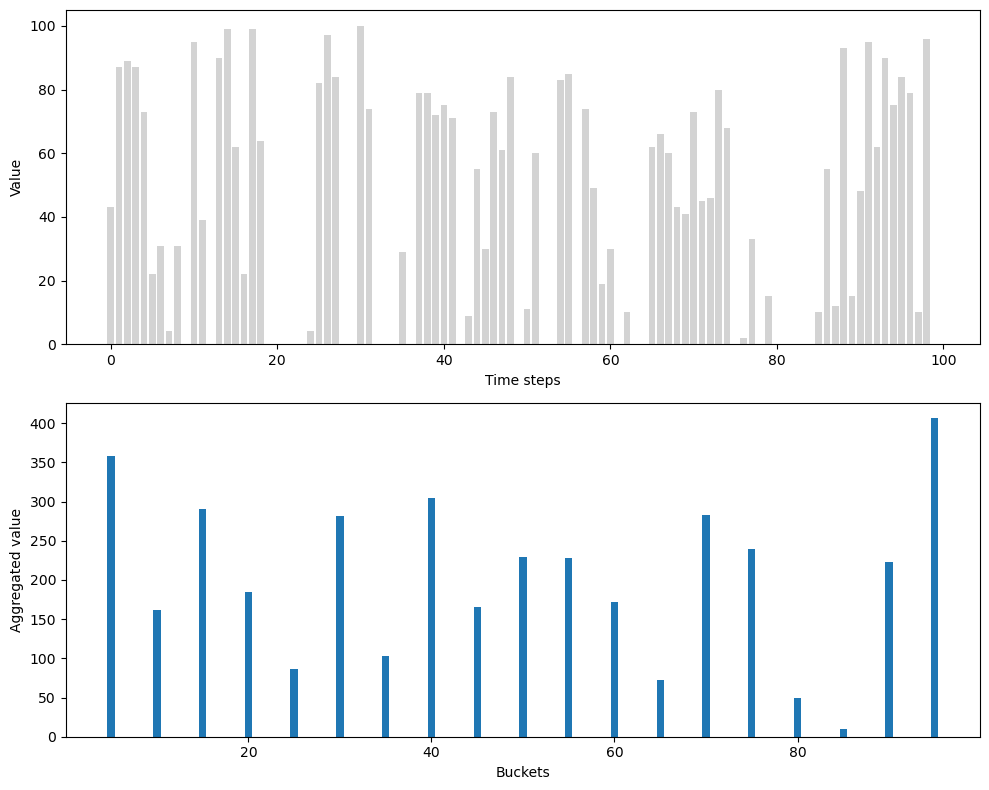

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

ax1.bar(sim_df.index, sim_df['y'], color='lightgray')
ax1.set_ylabel('Value')
ax1.set_xlabel('Time steps')

ax2.bar(agg_sim_df[1:].index, agg_sim_df[1:])
ax2.set_ylabel("Aggregated value")
ax2.set_xlabel('Buckets')

plt.tight_layout()

In [9]:
from statsforecast.models import ADIDA

models = [CrostonOptimized(), ADIDA()]

sf = StatsForecast(
    df=sim_df,
    models=models,
    freq='H',
    n_jobs=-1
)

cv_df = sf.cross_validation(
    df=sim_df,
    h=1,
    step_size=1,
    n_windows=50
)

cv_df.index = np.arange(50, 100, 1)

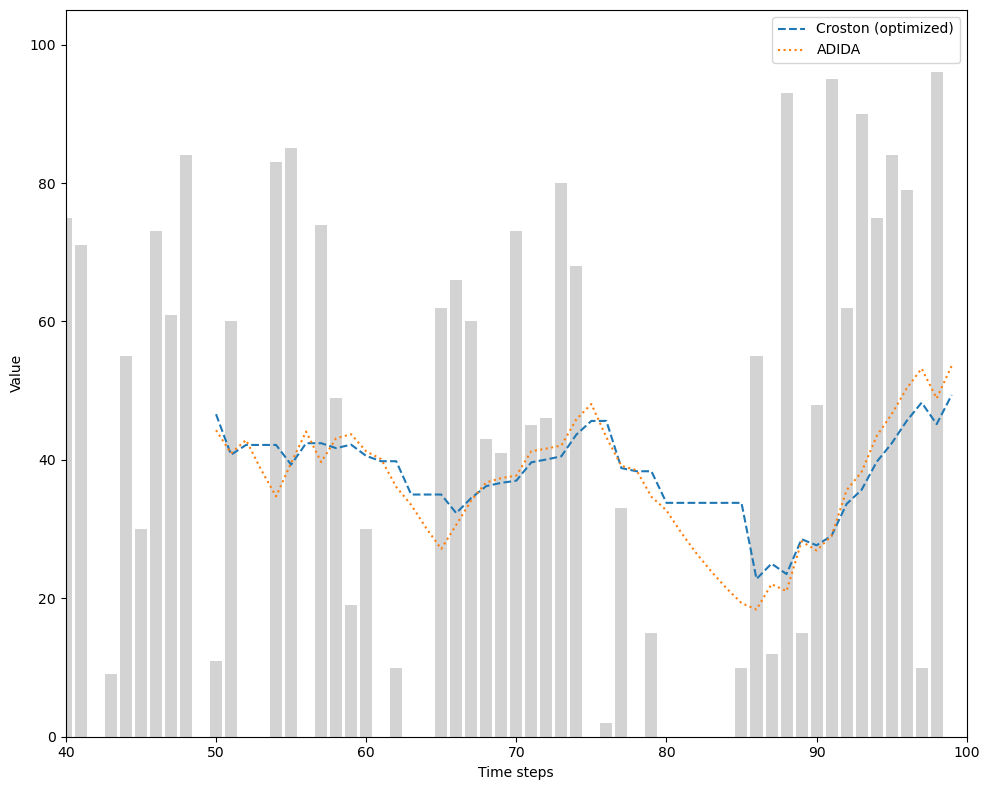

In [10]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(sim_df.index, sim_df['y'], color='lightgray')
ax.plot(cv_df.index, cv_df['CrostonOptimized'], ls='--', label='Croston (optimized)')
ax.plot(cv_df.index, cv_df['ADIDA'], ls=':', label='ADIDA')
ax.set_ylabel('Value')
ax.set_xlabel('Time steps')
ax.legend(loc='best')
plt.xlim(40, 100)

plt.tight_layout()

## IMAPA

In [11]:
from statsforecast.models import IMAPA

models = [ADIDA(), IMAPA()]

sf = StatsForecast(
    df=sim_df,
    models=models,
    freq='H',
    n_jobs=-1
)

cv_df = sf.cross_validation(
    df=sim_df,
    h=1,
    step_size=1,
    n_windows=50
)

cv_df.index = np.arange(50, 100, 1)

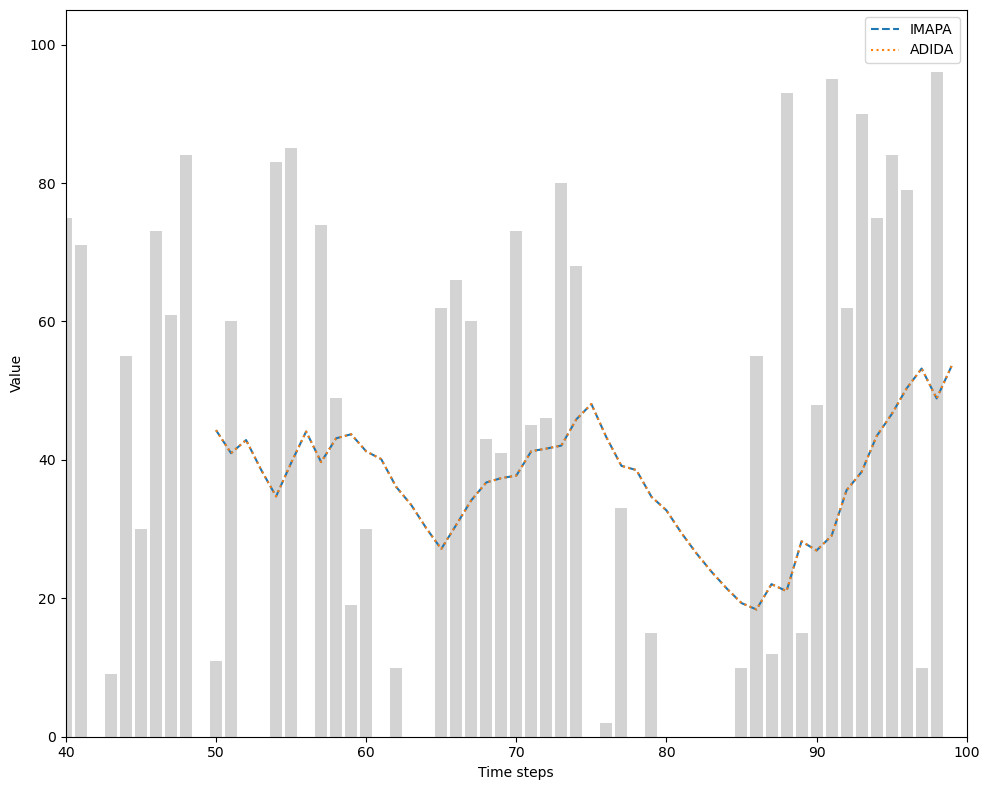

In [12]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(sim_df.index, sim_df['y'], color='lightgray')
ax.plot(cv_df.index, cv_df['IMAPA'], ls='--', label='IMAPA')
ax.plot(cv_df.index, cv_df['ADIDA'], ls=':', label='ADIDA')
ax.set_ylabel('Value')
ax.set_xlabel('Time steps')
ax.legend(loc='best')
plt.xlim(40, 100)

plt.tight_layout()

## TSB 

In [13]:
from statsforecast.models import TSB

models = [TSB(0.1, 0.1), CrostonClassic()]

sf = StatsForecast(
    df=sim_df,
    models=models,
    freq='H',
    n_jobs=-1
)

cv_df = sf.cross_validation(
    df=sim_df,
    h=1,
    step_size=1,
    n_windows=50
)

cv_df.index = np.arange(50, 100, 1)

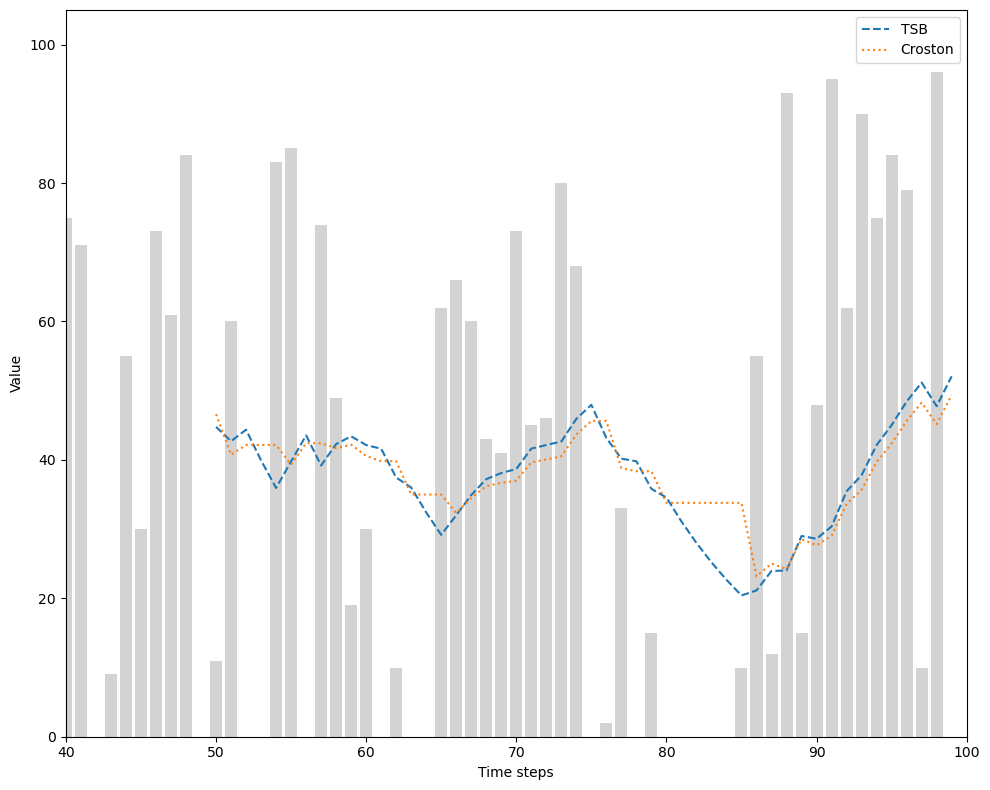

In [14]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(sim_df.index, sim_df['y'], color='lightgray')
ax.plot(cv_df.index, cv_df['TSB'], ls='--', label='TSB')
ax.plot(cv_df.index, cv_df['CrostonClassic'], ls=':', label='Croston')
ax.set_ylabel('Value')
ax.set_xlabel('Time steps')
ax.legend(loc='best')
plt.xlim(40, 100)

plt.tight_layout()

## Capstone - Wind turbine output

In [26]:
df = pd.read_csv('TexasTurbine.csv')

df = df.drop(['Wind speed | (m/s)', 'Wind direction | (deg)', 'Pressure | (atm)', "Air temperature | ('C)"], axis=1)

start_date = pd.to_datetime('2023-01-01 00:00:00')
end_date = pd.to_datetime('2023-12-31 23:00:00')
date_range = pd.date_range(start=start_date, end=end_date, freq='H')

df['ds'] = date_range

df = df.rename(columns={'System power generated | (kW)': "y"})

df = df.drop(['Time stamp'], axis=1)

df['unique_id'] = 1
df = df[['unique_id', 'ds', 'y']]

df.head()

,unique_id,ds,y
0,1,2023-01-01 00:00:00,1766.64
1,1,2023-01-01 01:00:00,1433.83
2,1,2023-01-01 02:00:00,1167.23
3,1,2023-01-01 03:00:00,1524.59
4,1,2023-01-01 04:00:00,1384.28


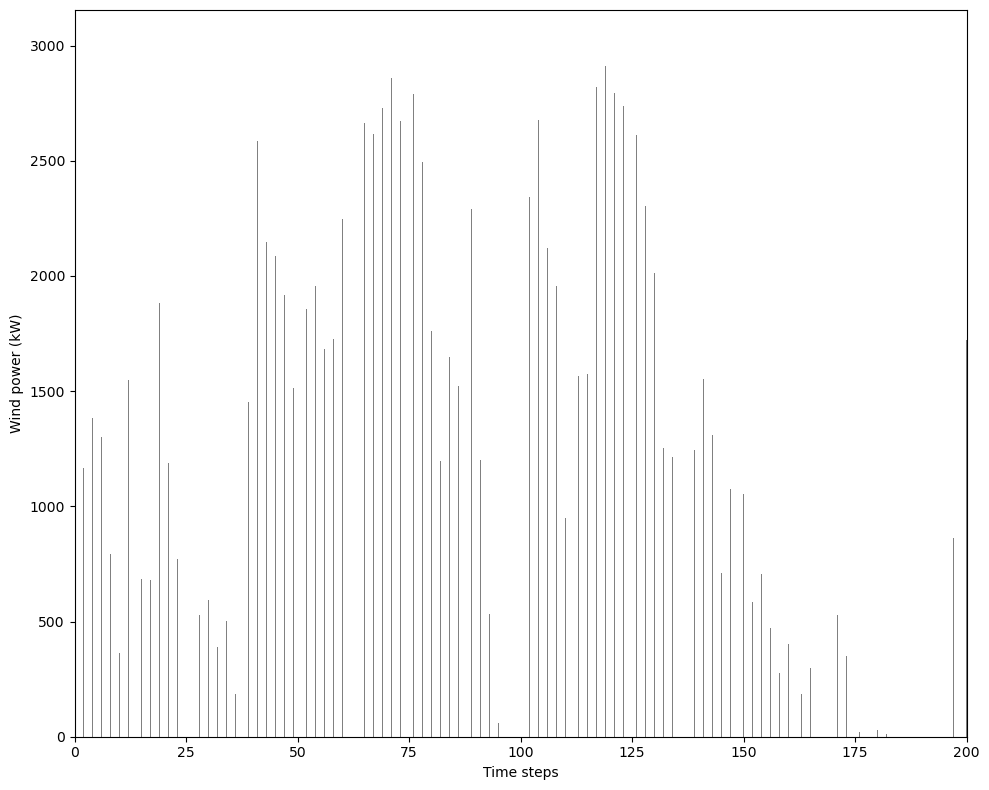

In [36]:
fig, ax = plt.subplots( figsize=(10,8))

ax.bar(df.index, df['y'], color='grey', width=0.1)
ax.set_ylabel('Wind power (kW)')
ax.set_xlabel('Time steps')

plt.xlim(0, 200)
plt.tight_layout()

### Forecast next hour 

In [72]:
from statsforecast.models import SimpleExponentialSmoothingOptimized as SESOpt

models = [CrostonOptimized(), ADIDA(), IMAPA(), TSB(0.2, 0.2), SESOpt()]

sf = StatsForecast(
    df=df,
    models=models,
    freq='H',
    n_jobs=-1
)

h_cv_df = sf.cross_validation(
    df=df,
    h=1,
    step_size=1,
    n_windows=50
)

h_cv_df.index = np.arange(8709, 8759, 1)

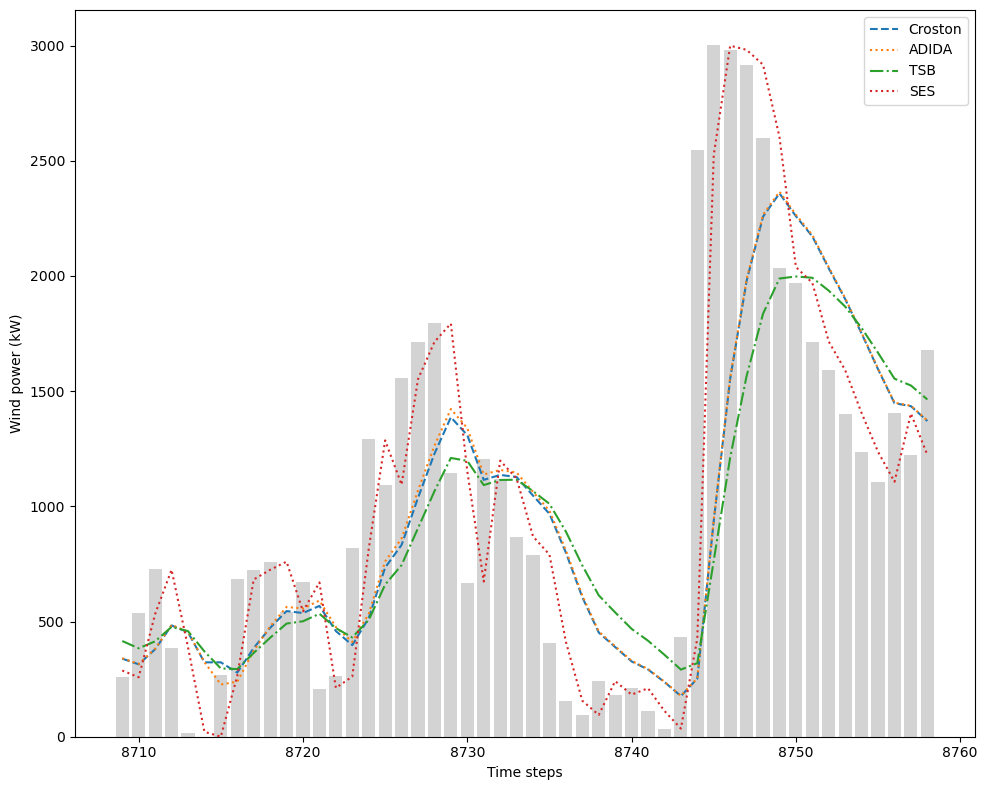

In [74]:
fig, ax = plt.subplots( figsize=(10,8))

ax.bar(h_cv_df.index, h_cv_df['y'], color='lightgrey')
ax.plot(h_cv_df.index, h_cv_df['CrostonOptimized'], ls='--', label='Croston')
ax.plot(h_cv_df.index, h_cv_df['ADIDA'], ls=':', label='ADIDA')
ax.plot(h_cv_df.index, h_cv_df['TSB'], ls='-.', label='TSB')
ax.plot(h_cv_df.index, h_cv_df['SESOpt'], ls=':', label='SES')

ax.set_ylabel('Wind power (kW)')
ax.set_xlabel('Time steps')

ax.legend(loc='best')

plt.tight_layout()

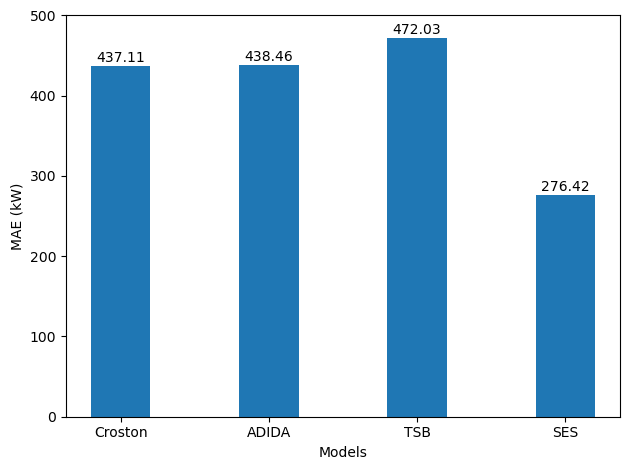

In [75]:
from sklearn.metrics import mean_absolute_error

mae_croston_h = mean_absolute_error(h_cv_df['y'], h_cv_df['CrostonOptimized'])
mae_adida_h = mean_absolute_error(h_cv_df['y'], h_cv_df['ADIDA'])
mae_tsb_h = mean_absolute_error(h_cv_df['y'], h_cv_df['TSB'])
mae_ses_h = mean_absolute_error(h_cv_df['y'], h_cv_df['SESOpt'])

y = [mae_croston_h, mae_adida_h, mae_tsb_h, mae_ses_h]
x = ['Croston', 'ADIDA', 'TSB', 'SES']

fig, ax = plt.subplots()

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAE (kW)')
ax.set_xlabel('Models')
ax.set_ylim(0, 500)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 5, s=str(round(value,2)), ha='center')
    
plt.tight_layout()

### Forecast next day 

In [76]:
models = [CrostonOptimized(), ADIDA(), IMAPA(), TSB(0.2, 0.2), SESOpt()]

sf = StatsForecast(
    df=df,
    models=models,
    freq='H',
    n_jobs=-1
)

d_cv_df = sf.cross_validation(
    df=df,
    h=24,
    step_size=24,
    n_windows=5
)

d_cv_df.index = np.arange(8639, 8759, 1)

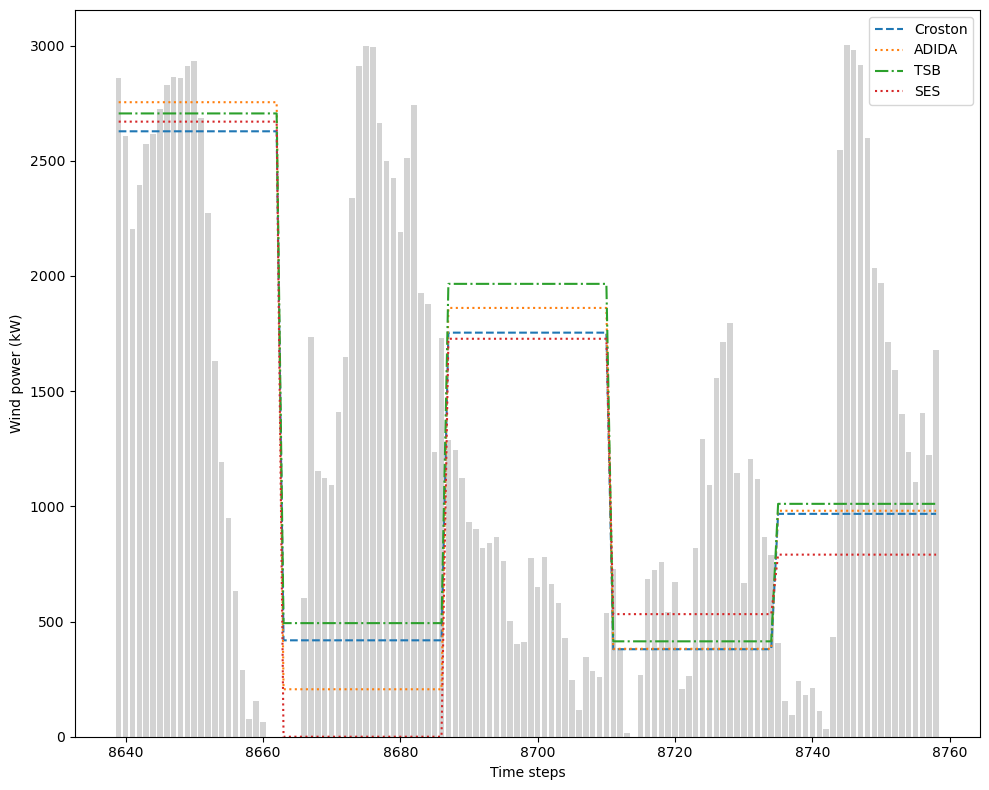

In [78]:
fig, ax = plt.subplots( figsize=(10,8))

ax.bar(d_cv_df.index, d_cv_df['y'], color='lightgrey')
ax.plot(d_cv_df.index, d_cv_df['CrostonOptimized'], ls='--', label='Croston')
ax.plot(d_cv_df.index, d_cv_df['ADIDA'], ls=':', label='ADIDA')
ax.plot(d_cv_df.index, d_cv_df['TSB'], ls='-.', label='TSB')
ax.plot(d_cv_df.index, d_cv_df['SESOpt'], ls=':', label='SES')

ax.set_ylabel('Wind power (kW)')
ax.set_xlabel('Time steps')

ax.legend(loc='best')

plt.tight_layout()

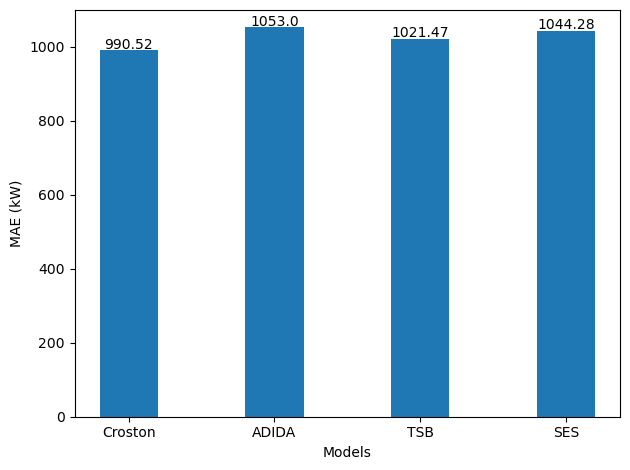

In [80]:
mae_croston_d = mean_absolute_error(d_cv_df['y'], d_cv_df['CrostonOptimized'])
mae_adida_d = mean_absolute_error(d_cv_df['y'], d_cv_df['ADIDA'])
mae_tsb_d = mean_absolute_error(d_cv_df['y'], d_cv_df['TSB'])
mae_ses_d = mean_absolute_error(d_cv_df['y'], d_cv_df['SESOpt'])

y = [mae_croston_d, mae_adida_d, mae_tsb_d, mae_ses_d]
x = ['Croston', 'ADIDA', 'TSB', 'SES']

fig, ax = plt.subplots()

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAE (kW)')
ax.set_xlabel('Models')
ax.set_ylim(0, 1100)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 5, s=str(round(value,2)), ha='center')
    
plt.tight_layout()

### Forecast next week 

In [81]:
models = [CrostonOptimized(), ADIDA(), IMAPA(), TSB(0.2, 0.2), SESOpt()]

sf = StatsForecast(
    df=df,
    models=models,
    freq='H',
    n_jobs=-1
)

w_cv_df = sf.cross_validation(
    df=df,
    h=168,
    step_size=168,
    n_windows=2
)

w_cv_df.index = np.arange(8423, 8759, 1)

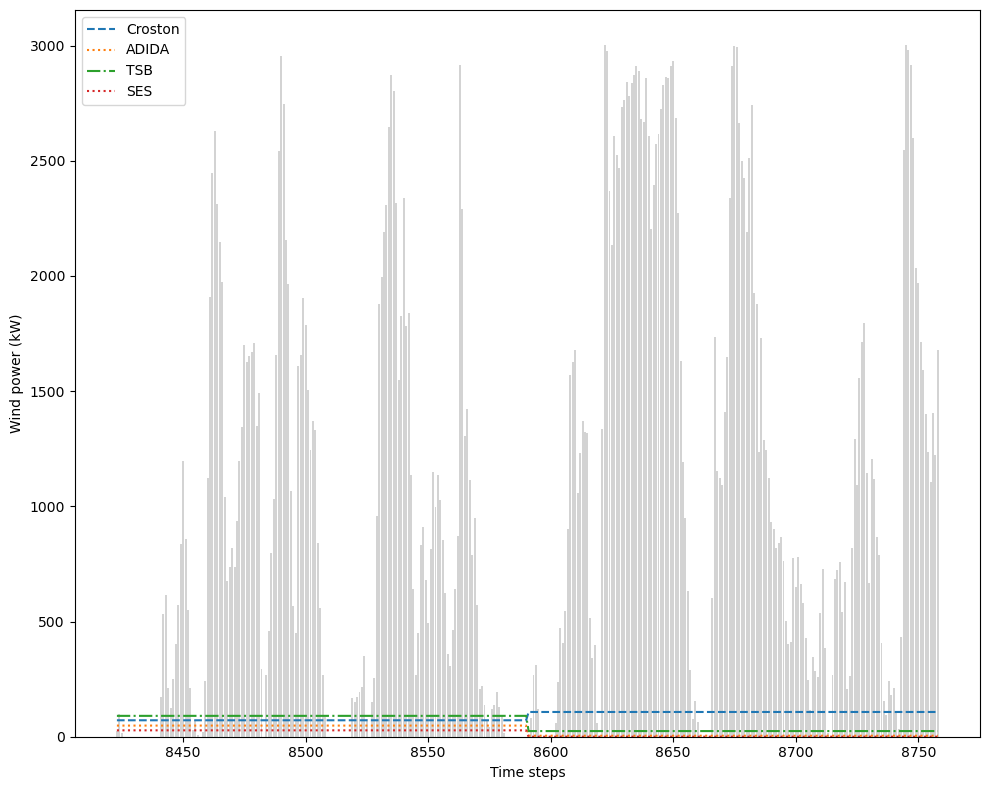

In [82]:
fig, ax = plt.subplots( figsize=(10,8))

ax.bar(w_cv_df.index, w_cv_df['y'], color='lightgrey')
ax.plot(w_cv_df.index, w_cv_df['CrostonOptimized'], ls='--', label='Croston')
ax.plot(w_cv_df.index, w_cv_df['ADIDA'], ls=':', label='ADIDA')
ax.plot(w_cv_df.index, w_cv_df['TSB'], ls='-.', label='TSB')
ax.plot(w_cv_df.index, w_cv_df['SESOpt'], ls=':', label='SES')

ax.set_ylabel('Wind power (kW)')
ax.set_xlabel('Time steps')

ax.legend(loc='best')

plt.tight_layout()

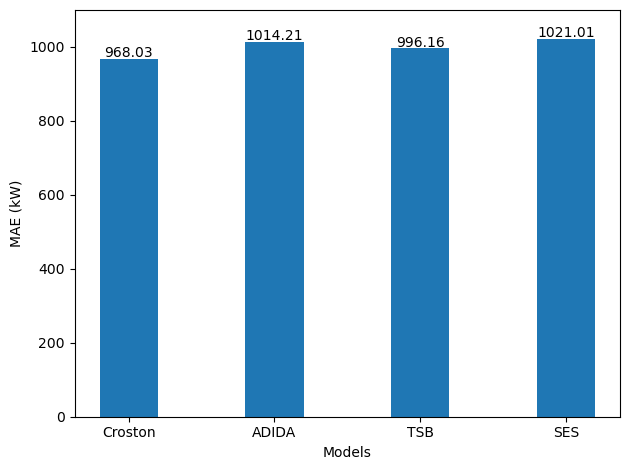

In [83]:
mae_croston_w = mean_absolute_error(w_cv_df['y'], w_cv_df['CrostonOptimized'])
mae_adida_w = mean_absolute_error(w_cv_df['y'], w_cv_df['ADIDA'])
mae_tsb_w = mean_absolute_error(w_cv_df['y'], w_cv_df['TSB'])
mae_ses_w = mean_absolute_error(w_cv_df['y'], w_cv_df['SESOpt'])

y = [mae_croston_w, mae_adida_w, mae_tsb_w, mae_ses_w]
x = ['Croston', 'ADIDA', 'TSB', 'SES']

fig, ax = plt.subplots()

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAE (kW)')
ax.set_xlabel('Models')
ax.set_ylim(0, 1100)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 5, s=str(round(value,2)), ha='center')
    
plt.tight_layout()